<a href="https://colab.research.google.com/github/amrrmadhn/bmlp-dicoding/blob/master/Klasifikasi/%5BKlasifikasi%5D%20Submission%20Akhir%20BMLP_Ammar%20Ramadhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import joblib
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]
# Lengkapi kode berikut
url='https://raw.githubusercontent.com/amrrmadhn/bmlp-dicoding/refs/heads/master/Clustering/data_clustering.csv'
df = pd.read_csv(url)

In [ ]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,CustomerAge_Group,CustomerAge_Group_Encoded,TransactionAmount_Group,TransactionAmount_Group_Encoded,Target
0,0.007207,680.0,1.0,36.0,0.0,0.838710,0.0,0.244828,0.0,0.336832,105.0,Young,0,Low,0,0
1,0.195940,1178.0,1.0,15.0,0.0,0.806452,0.0,0.451724,0.0,0.918055,192.0,Young,0,Low,0,0
2,0.065680,1262.0,1.0,23.0,2.0,0.016129,3.0,0.158621,0.0,0.068637,41.0,Young,0,Low,0,3
3,0.096016,818.0,1.0,33.0,2.0,0.129032,3.0,0.051724,0.0,0.569198,163.0,Young,0,Low,0,0
4,0.006874,1939.0,1.0,1.0,2.0,0.435484,3.0,0.648276,0.0,0.492591,16.0,Young,0,Low,0,1


In [ ]:
df = df.drop(['CustomerAge_Group', 'TransactionAmount_Group'], axis=1)

In [ ]:
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,CustomerAge_Group_Encoded,TransactionAmount_Group_Encoded,Target
0,0.007207,680.0,1.0,36.0,0.0,0.838710,0.0,0.244828,0.0,0.336832,105.0,0,0,0
1,0.195940,1178.0,1.0,15.0,0.0,0.806452,0.0,0.451724,0.0,0.918055,192.0,0,0,0
2,0.065680,1262.0,1.0,23.0,2.0,0.016129,3.0,0.158621,0.0,0.068637,41.0,0,0,3
3,0.096016,818.0,1.0,33.0,2.0,0.129032,3.0,0.051724,0.0,0.569198,163.0,0,0,0
4,0.006874,1939.0,1.0,1.0,2.0,0.435484,3.0,0.648276,0.0,0.492591,16.0,0,0,1


# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Melihat ukuran dataset
print("Ukuran dataset:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Melihat distribusi kelas (jika klasifikasi)
print("\nDistribusi kelas di data training:")
print(y_train.value_counts())
print("\nDistribusi kelas di data testing:")
print(y_test.value_counts())

Ukuran dataset:
X_train: (2011, 13)
X_test: (503, 13)
y_train: (2011,)
y_test: (503,)

Distribusi kelas di data training:
Target
1    515
2    506
0    497
3    493
Name: count, dtype: int64

Distribusi kelas di data testing:
Target
3    135
0    128
2    123
1    117
Name: count, dtype: int64


# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

In [ ]:
# Buatlah model klasifikasi menggunakan Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Melatih model dengan data training
dt_model.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred = dt_model.predict(X_test)

# Evaluasi model
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Akurasi Model: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       117
           2       1.00      1.00      1.00       123
           3       1.00      1.00      1.00       135

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503


Confusion Matrix:
[[128   0   0   0]
 [  0 117   0   0]
 [  0   0 123   0]
 [  0   0   0 135]]


In [ ]:
# Menyimpan Model
# import joblib
joblib.dump(dt_model, 'decision_tree_model.h5')

['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [ ]:
# Melatih model menggunakan algoritma klasifikasi scikit-learn selain Decision Tree.

In [ ]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.

In [ ]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
# import joblib
# joblib.dump(___, 'explore_<Nama Algoritma>_classification.h5')

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [ ]:
# Lakukan Hyperparameter Tuning dan Latih ulang.
# Lakukan dalam satu cell ini saja.
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Buat model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Lakukan Grid Search dengan Cross Validation
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross validation
    scoring='accuracy',
    n_jobs=-1,  # Gunakan semua CPU cores
    verbose=1
)

# Fit model dengan data training
print("Melakukan Hyperparameter Tuning...")
grid_search.fit(X_train, y_train)

# Best parameters
print("\n" + "="*60)
print("Best Parameters:")
print(grid_search.best_params_)
print(f"\nBest Cross-Validation Score: {grid_search.best_score_:.4f}")
print("="*60 + "\n")

# Gunakan model terbaik untuk prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluasi model
print("Hasil Evaluasi Model Terbaik:")
print(f"Akurasi pada Test Set: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Melakukan Hyperparameter Tuning...
Fitting 5 folds for each of 480 candidates, totalling 2400 fits

Best Parameters:
{'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Best Cross-Validation Score: 0.9990

Hasil Evaluasi Model Terbaik:
Akurasi pada Test Set: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       117
           2       1.00      1.00      1.00       123
           3       1.00      1.00      1.00       135

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503


Confusion Matrix:
[[128   0   0   0]
 [  0 117   0   0]
 [  0   0 123   0]
 [  0   0   0 135]]


In [ ]:
# Tampilkan feature importance
print("\n" + "="*60)
print("Feature Importance (Top 10):")
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance.head(10))


Feature Importance (Top 10):
               Feature  Importance
1      TransactionDate         1.0
0    TransactionAmount         0.0
2      TransactionType         0.0
3             Location         0.0
4              Channel         0.0
5          CustomerAge         0.0
6   CustomerOccupation         0.0
7  TransactionDuration         0.0
8        LoginAttempts         0.0
9       AccountBalance         0.0


HASIL EVALUASI MODEL DECISION TREE (SETELAH TUNING)
Akurasi   : 1.0000 (100.00%)
Precision : 1.0000 (100.00%)
Recall    : 1.0000 (100.00%)
F1-Score  : 1.0000 (100.00%)

CLASSIFICATION REPORT DETAIL:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       117
           2       1.00      1.00      1.00       123
           3       1.00      1.00      1.00       135

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503

CONFUSION MATRIX:
[[128   0   0   0]
 [  0 117   0   0]
 [  0   0 123   0]
 [  0   0   0 135]]


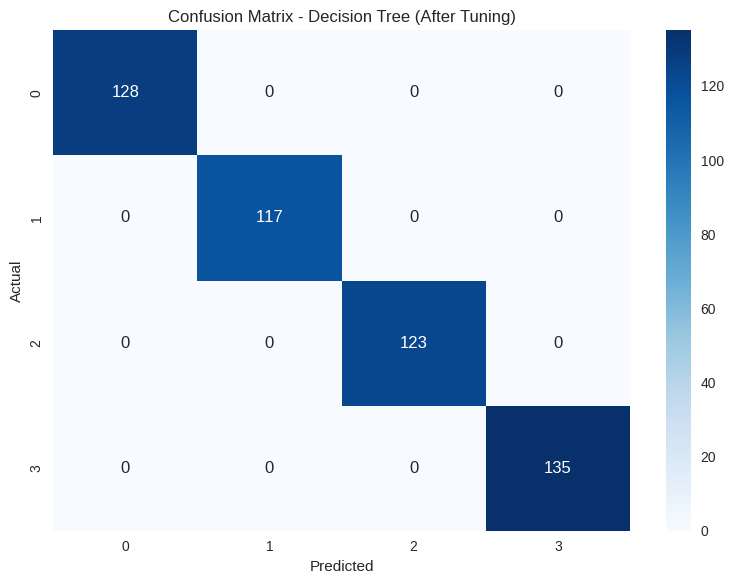


RINGKASAN METRIK:
   Metric  Score
 Accuracy    1.0
Precision    1.0
   Recall    1.0
 F1-Score    1.0


In [ ]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.
y_pred = best_model.predict(X_test)

# Hitung semua metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Tampilkan hasil evaluasi

print("HASIL EVALUASI MODEL DECISION TREE (SETELAH TUNING)")

print(f"Akurasi   : {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision : {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall    : {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score  : {f1:.4f} ({f1*100:.2f}%)")


# Tampilkan classification report lengkap
print("\nCLASSIFICATION REPORT DETAIL:")

print(classification_report(y_test, y_pred))

# Tampilkan confusion matrix
print("CONFUSION MATRIX:")

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualisasi confusion matrix (opsional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()))
plt.title('Confusion Matrix - Decision Tree (After Tuning)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# Buat dataframe untuk perbandingan metrik
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [accuracy, precision, recall, f1]
})
print("\nRINGKASAN METRIK:")
print("="*60)
print(metrics_df.to_string(index=False))

In [ ]:
# Menyimpan Model hasil tuning
# import joblib
joblib.dump(best_model, 'tuning_classification.h5')

['tuning_classification.h5']

End of Code